# Exploratory Data Analysis. Spaceship titanic.

This is the first notebook of the spaceship titanic. Here we are focusing on getting to know the data, identifiying missing values and outliers and doing the EDA.

# Conclusion of the EDA
* **Missing data**: All of the columns, except for id of the passenger have missing values. There are around 200 missing values for each of the columns. The data seem to be missing completely at random. Throughout our exploratory data analysis, we haven't found any pattern among rows with missing values.
* **Association with the target variable**: 
    * There is an association between the planet the passenger departed from and their chance of transporation. Test for statistical significance has given statistically significant values for Europa and Earth categories and the target variable.
    * There is a strong association between suspended animation and the chance of transportation. 
    * Passengers traveling to 55 Cancri e planet had a notably higher likelihood of being transported, indicating a potential risk factor. There is a significant association between the TRAPPIST-1e destination and the target variable, highlighting its relevance in transportation risk.
    * Passengers who paid for VIP services were less likely to be transported. This suggests that financial resources might be associated with better protection or preparedness, potentially reducing the risk of transportation.
    * Passengers on the starboard side had a slightly higher likelihood of being transported compared to those on the port side. 
    * There is significant association between the child and the chance of transportation. Children had significantly higher chance of being transported.
    * Passengers who were transported to another dimension paid significantly less for services such as VRDeck, RoomService, and Spa compared to those who were not transported. The amount spent on ShoppingMall services was similar for both transported and non-transported passengers. Passengers who spent more on the Food Court had a higher chance of being transported. This association is similar regardless of the HomePlanet, Destination, Deck, Side columns.
    * People, who had more people in their cabin, had higher chance of transportation. In addition, those, who were in a group of 2 or more people, were also at a higher risk.

* **Association between the predictor columns**
    * On Deck A, B and C almost all of the passengers are from Europa. On Deck G almost all of the passengers are from Earth. In addition, majority of the passengers from the D deck are from Mars.
    * All people, who belong the same group, travel from the same HomePlanet. In addition, almost all people, who share the same last name, are from the same HomePlanet.
    * The number of people on different sides is similar between all decks.
    * There is linear relationship between the group number and cabin number of the passenger.


## Dataset overview:
**Number of observations**: 8693

**Number of features**: 14

**Attributes**:
* PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

* HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

* CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

* Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

* Destination - The planet the passenger will be debarking to.

* Age - The age of the passenger.

* VIP - Whether the passenger has paid for special VIP service during the voyage.

* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

* Name - The first and last names of the passenger.

* Transported - Whether the passenger was transported to another dimension. This is the target, the column we are trying to predict.

**Target population**: In the source of the dataset, the target population is not indicated. For educational purposes, let's assume it's general population.

## First look into the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import helper_functions
from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings("ignore", message=".*set_ticklabels.*")

In [2]:
data = pd.read_csv("data/train.csv")

In [3]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
data.shape

(8693, 14)

Check the uniqueness of id column

In [5]:
data["PassengerId"].is_unique

True

In [6]:
data.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [7]:
data.isnull().any()

PassengerId     False
HomePlanet       True
CryoSleep        True
Cabin            True
Destination      True
Age              True
VIP              True
RoomService      True
FoodCourt        True
ShoppingMall     True
Spa              True
VRDeck           True
Name             True
Transported     False
dtype: bool

There are missing values in majority of columns

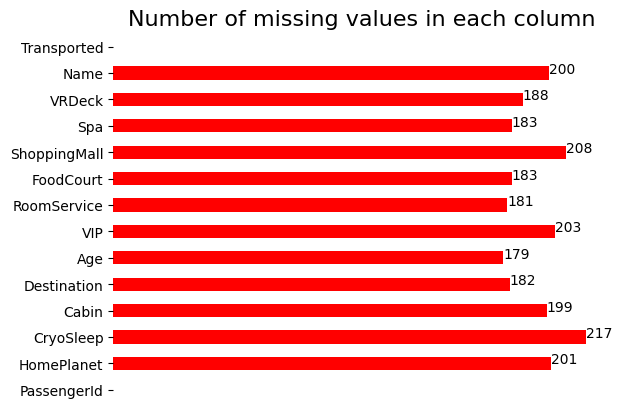

In [8]:
missing_count = data.isnull().sum()
missing_count.plot(kind="barh", color="red")
helper_functions.customize_bar(position="h", axes=plt.gca(), values_font=10)
plt.title("Number of missing values in each column", fontsize=16);

All of the columns, except for PassengerId and target variable have missing values. All of them have around 200 of missing entries.

Let's check number of missing entries for rows.

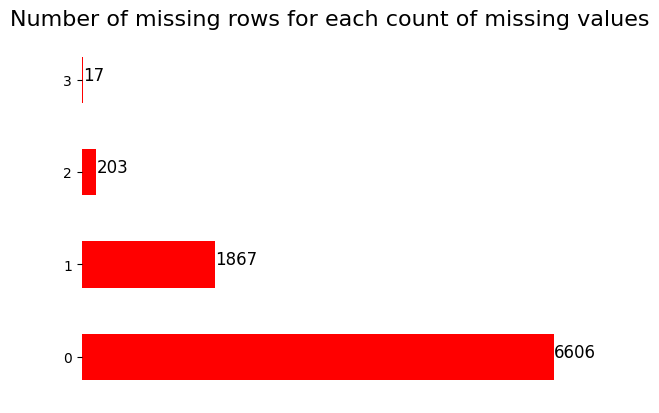

In [9]:
missing_count_byrow = (data.isnull().sum(axis=1)
                       .sort_values(ascending=False).value_counts())
missing_count_byrow.plot(kind="barh", color="red")
helper_functions.customize_bar(position="h", axes=plt.gca())
plt.title("Number of missing rows for each count of missing values", fontsize=16);

We see that rows can have up to 3 missing values. There are only 17 of those with 3 missing entries. Majority of rows with missing data have only one missing entry.

**Vizualize missing data**

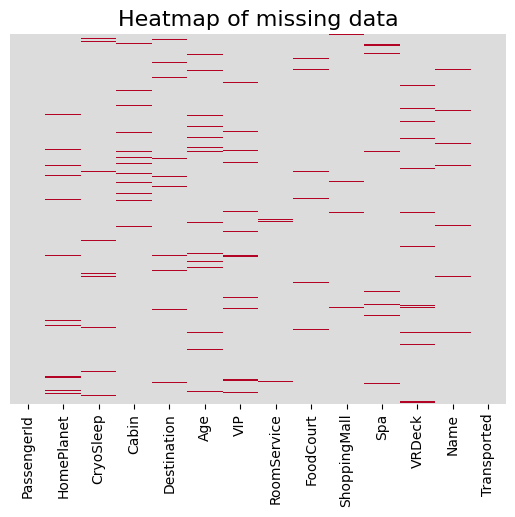

In [10]:
htmp = sns.heatmap(data.isnull(), cbar=False, cmap="coolwarm", vmin=-1, vmax=1)
htmp.set_yticks([])
plt.title("Heatmap of missing data", fontsize=16);

By looking at the heatmap, we can say that the data seem to be missing througout all of the dataframe. There seems to be no pattern here.

**Relationship between missingness**

In [11]:
data.isna()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8689,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8690,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8691,False,False,False,False,False,False,False,False,False,False,False,False,False,False


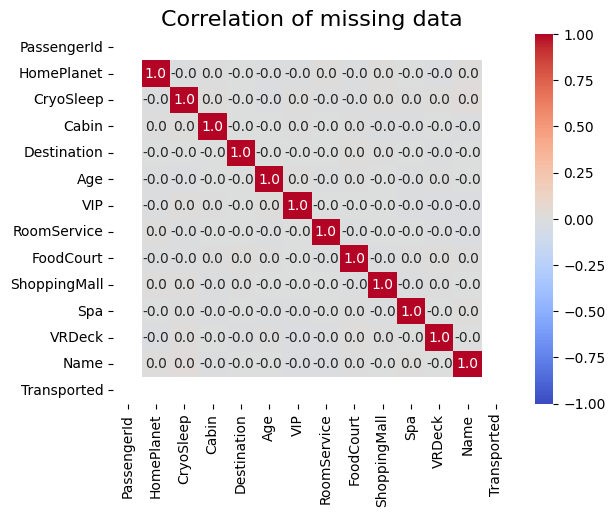

In [11]:
missing_corr = data.isna().corr()
sns.heatmap(missing_corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1, fmt=".1f")
plt.title("Correlation of missing data", fontsize=16);

All of the columns with missing data are uncorrelated with each other, meaning that missing data in one column isn't related to another column

Replace nan values with "UNKNOWN" in string columns:

In [12]:
data[data.select_dtypes("object").columns] = (
    data[data.select_dtypes("object").columns].fillna("UNKNOWN"))

**Check for misspelling in each of the categorical columns**

In [13]:
for i in range(2):
    values = data["PassengerId"].apply(
        lambda x: x.split("_")[i])
    print(values.astype(int).unique())

[   1    2    3 ... 9278 9279 9280]
[1 2 3 4 5 6 7 8]


In [14]:
cat_columns = ["HomePlanet", "CryoSleep", 
               "Destination", "VIP", "Transported"]
for column in cat_columns:
    print("-----------------------------------------")
    print(column)
    print(data[column].unique())

-----------------------------------------
HomePlanet
['Europa' 'Earth' 'Mars' 'UNKNOWN']
-----------------------------------------
CryoSleep
[False True 'UNKNOWN']
-----------------------------------------
Destination
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' 'UNKNOWN']
-----------------------------------------
VIP
[False True 'UNKNOWN']
-----------------------------------------
Transported
[False  True]


Split the cabin column and check:
* Deck
* Side
* Number

In [15]:
cabin_split = data["Cabin"].str.split("/")
for i in range(3):
    values = data["Cabin"].apply(
        lambda x: x.split("/")[i] if x != 'UNKNOWN' else "UNKNOWN")
    if i == 1:
        print(values[values != "UNKNOWN"].astype(int).unique())
    else:
        print(values.unique())

['B' 'F' 'A' 'G' 'UNKNOWN' 'E' 'D' 'C' 'T']
[   0    1    2 ... 1892 1893 1894]
['P' 'S' 'UNKNOWN']


Check last names

In [16]:
data["Name"] = data["Name"].str.lower()
data[['first_name', 'last_name']] = data["Name"].str.split(' ', expand=True)
data.loc[data["Name"] == "unknown", "last_name"] = "unknown"

In [17]:
data["last_name"].value_counts().sort_values(ascending=False).head(10)

last_name
unknown       200
casonston      18
oneiles        16
domington      15
litthews       15
cartez         14
browlerson     14
garnes         14
fulloydez      14
moodman        13
Name: count, dtype: int64

Check numeric columns for outliers:

In [18]:
num_columns = data.select_dtypes("float64").columns
data[num_columns].describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [19]:
data["Age"].unique()

array([39., 24., 58., 33., 16., 44., 26., 28., 35., 14., 34., 45., 32.,
       48., 31., 27.,  0.,  1., 49., 29., 10.,  7., 21., 62., 15., 43.,
       47.,  2., 20., 23., 30., 17., 55.,  4., 19., 56., nan, 25., 38.,
       36., 22., 18., 42., 37., 13.,  8., 40.,  3., 54.,  9.,  6., 64.,
       67., 61., 50., 41., 57., 11., 52., 51., 46., 60., 63., 59.,  5.,
       79., 68., 74., 12., 53., 65., 71., 75., 70., 76., 78., 73., 66.,
       69., 72., 77.])

There seem to be no outliers that have to be dropped. Age feature has 0 value. However, this column takes on only discrete values, meaning that 0 value is an infant.

## Exploratory Data Analysis

Before EDA, we will:
* Create group column, which indicates the group the passenger is travelling.
* Create columns: deck, side, cabin number.
* Replace True/False values with Yes/No for better readabillity 

In [20]:
data_eda = data.copy()
data_eda.loc[:, "Group"] = data_eda["PassengerId"].str[:4].astype(int)
data_eda[['Deck', 'CabinNumber', 'Side']] = data_eda["Cabin"].str.split('/', expand=True)
data_eda.loc[data_eda["Cabin"] == "UNKNOWN", "Side"] = "UNKNOWN"
data_eda.loc[data_eda["Cabin"] == "UNKNOWN", "CabinNumber"] = np.nan
data_eda["CabinNumber"] = data_eda["CabinNumber"].astype(float)

**Univariate analysis**

Plot the distribution of the categorical columns:

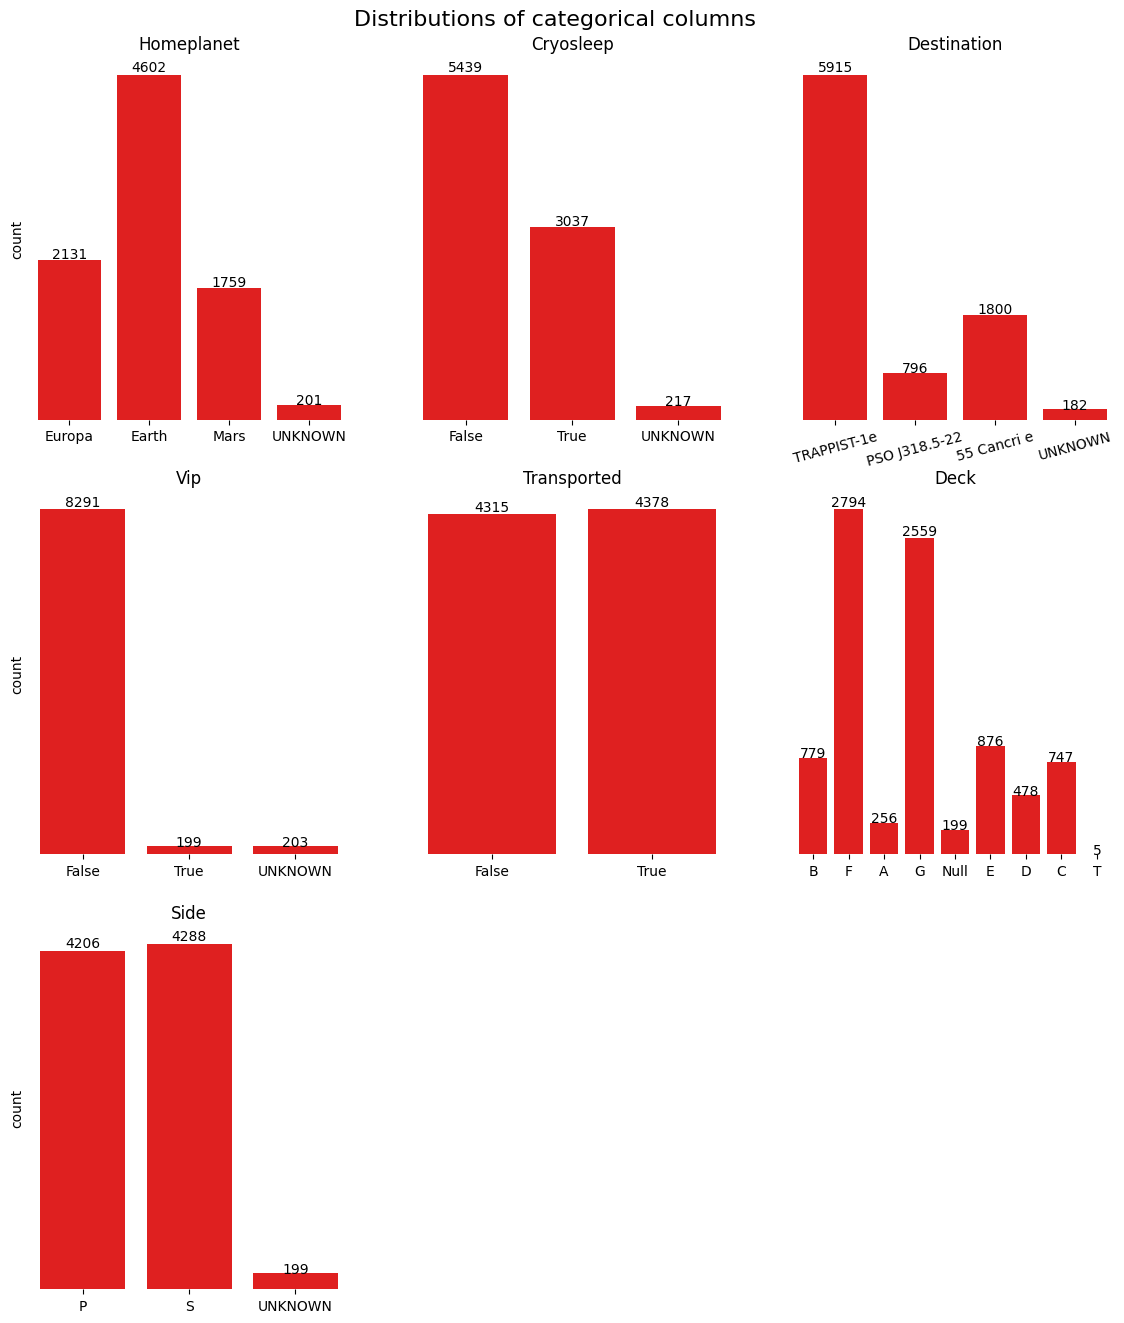

In [21]:
fig, plot = helper_functions.plot_cat_columns(data_eda, 
                                              cat_columns + ["Deck", "Side"], 
                                              "Distributions of categorical columns",
                                              figsize=(14, 16))
dest_axes = fig.get_axes()[2]
dest_axes.set_xticks(data_eda["Destination"].unique())
dest_axes.set_xticklabels(dest_axes.get_xticklabels(), rotation=15)

deck_axes = fig.get_axes()[-2]
deck_axes.set_xticklabels(["B", "F", "A", "G", "Null", "E", "D", "C", "T"]);

Most of the people have departed from planet Earth. The number of people who have departed from Europa or Mars are pretty similar. However, there a little bit more people from Europa.

There are almost two times less of those who were placed into a state of suspended animation compared to those who weren't.

Most of the passengers were heading to TRAPPIST-1E planet. Some were travelling to 55 Cancri e or PSO J318.5-22.

Only a small minority of people have payed for VIP services(almost 200). For the same number of people, the value of the feature is missing.

There are similar number of people on each side of the titanic.

Most people were on F or G deck. There are a lot of those on B, E, C decks. On the T deck, there are only 5 people.

There are similar number of people who were and weren't transported to another dimension. Therefore, we don't have class imbalance here.

Look into the people from the T deck:

In [22]:
data_eda[data_eda["Deck"] == "T"]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,first_name,last_name,Group,Deck,CabinNumber,Side
1004,1071_01,UNKNOWN,False,T/0/P,TRAPPIST-1e,35.0,False,415.0,1328.0,0.0,14.0,60.0,alraida dingauge,False,alraida,dingauge,1071,T,0.0,P
2254,2414_01,Europa,False,T/1/P,TRAPPIST-1e,42.0,False,0.0,1829.0,2.0,3133.0,2447.0,mergak headfair,False,mergak,headfair,2414,T,1.0,P
2734,2935_01,Europa,False,T/2/P,TRAPPIST-1e,33.0,False,0.0,28.0,0.0,6841.0,543.0,unknown,False,unknown,unknown,2935,T,2.0,P
2763,2971_01,Europa,False,T/3/P,TRAPPIST-1e,38.0,False,0.0,3135.0,0.0,26.0,3.0,pent sessiouse,True,pent,sessiouse,2971,T,3.0,P
4565,4863_01,Europa,UNKNOWN,T/2/S,TRAPPIST-1e,37.0,False,1721.0,667.0,NaN,28.0,1362.0,phacton unsible,False,phacton,unsible,4863,T,2.0,S


To ensure the robustness and accuracy of our analysis, we recommend dropping the rows corresponding to the T deck category. This approach will help to avoid potential issues with statistical tests that require a minimum sample size and will simplify the analysis by focusing on categories with more substantial representation.

In [23]:
data_eda = data_eda[data_eda["Deck"] != "T"]

**Distribution of numeric columns**

Distribution of Age

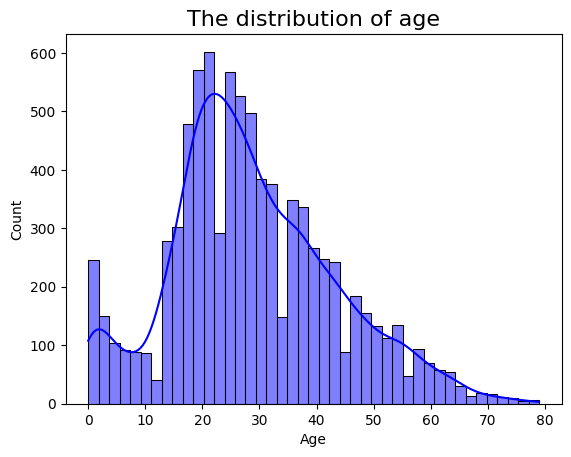

In [24]:
sns.histplot(x="Age", data=data_eda, kde=True, color="blue")
plt.title("The distribution of age", fontsize=16);

Most of the people are around 18 to 40 years old. The oldest are less than 80 years old. In addition, there is a big number of children and infants.

Distribution of Passenger Payments for Amenities

Boxplots excluding people who paid 0.

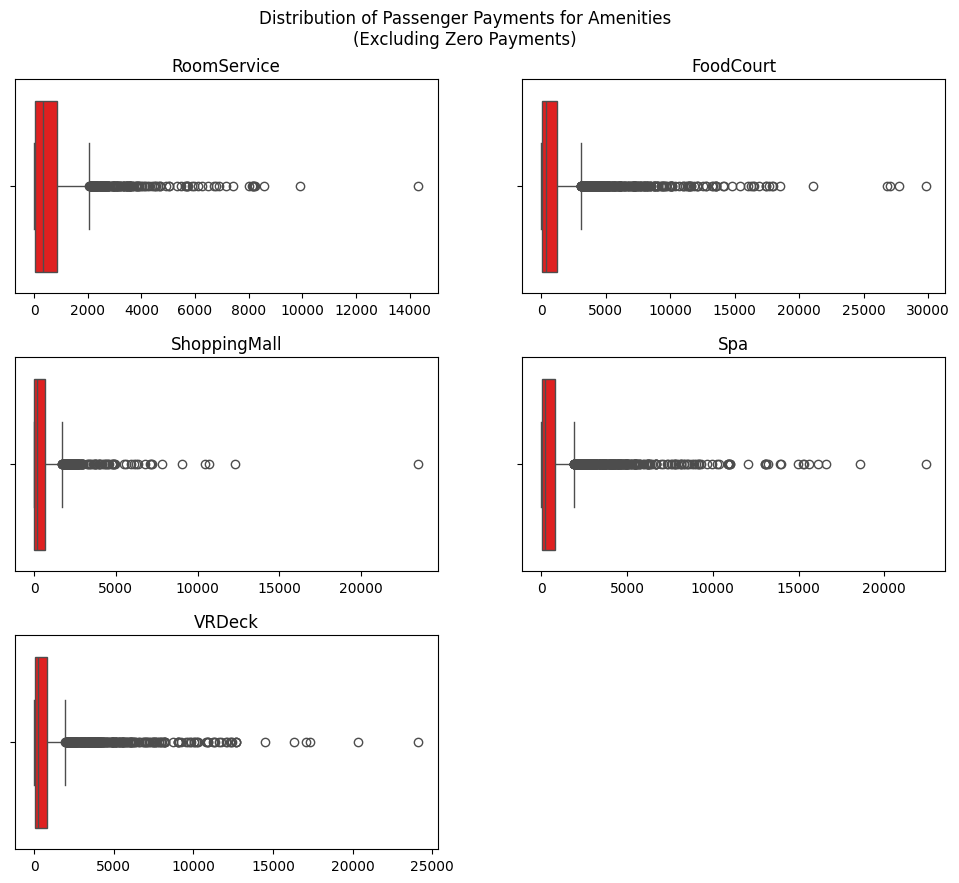

In [25]:
fig = plt.figure(figsize=(12, 10))
plt.suptitle("Distribution of Passenger Payments for Amenities\n"
             "(Excluding Zero Payments)", y=0.95)
plt.subplots_adjust(hspace=0.3)
counts = {}
for i, column in enumerate(num_columns[1:]):
    counts[column] = data_eda[data_eda[column] == 0].shape[0]
    ax = fig.add_subplot(3, 2, i+1)
    sns.boxplot(x=column, data=data_eda[data_eda[column] != 0], 
                ax=ax, color="red")
    ax.set_title(column)
    ax.set_xlabel("")

Number of passengers who didn't pay anything

In [26]:
counts

{'RoomService': 5574,
 'FoodCourt': 5456,
 'ShoppingMall': 5584,
 'Spa': 5324,
 'VRDeck': 5495}

Majority of the passengers didn't pay for amenity services. A lot of people paid a very small amount. Though, there are a lot of outliers, where people paid thousands of dollars on these amenities.

**Group column**

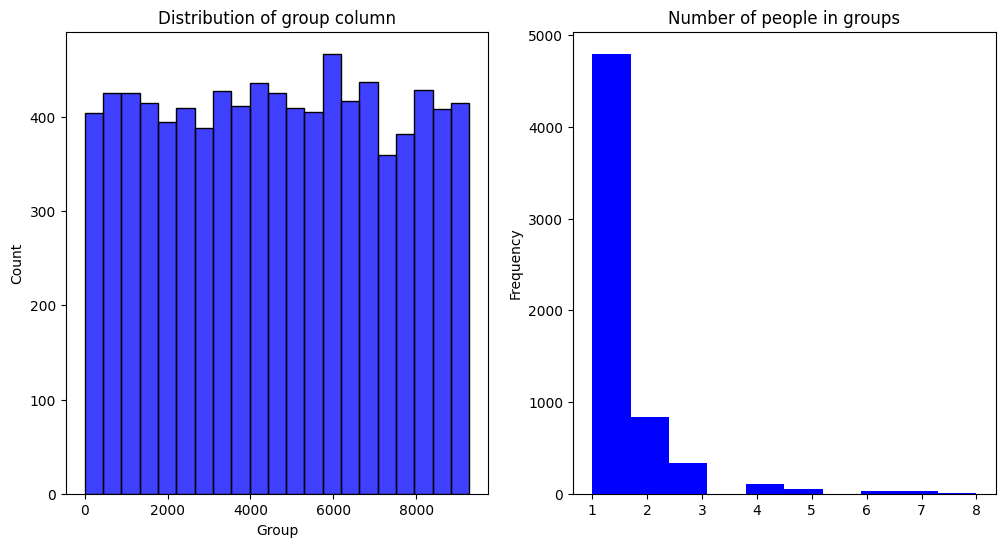

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].set_title("Distribution of group column")
sns.histplot(x="Group", data=data_eda, color="blue", ax=ax[0])


group_counts = data_eda["Group"].value_counts()
group_counts.plot(kind="hist", color="blue", ax=ax[1])
ax[1].set_title("Number of people in groups");

Number of the cabin:

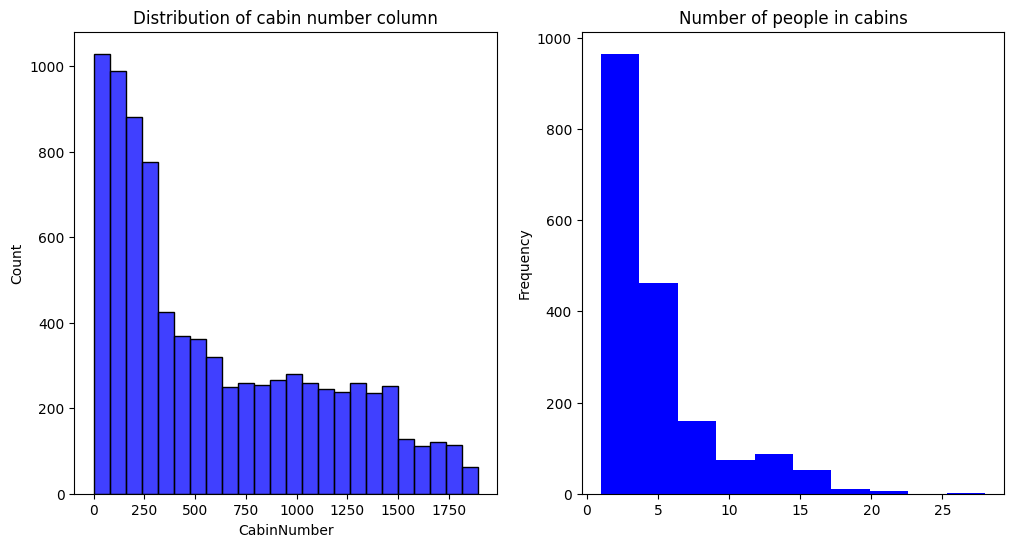

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].set_title("Distribution of cabin number column")
sns.histplot(x="CabinNumber", data=data_eda, color="blue", ax=ax[0])


group_counts = data_eda["CabinNumber"].value_counts()
group_counts.plot(kind="hist", color="blue", ax=ax[1])
ax[1].set_title("Number of people in cabins");

**Relationship between predictors and the target variable**

Categorical variables:

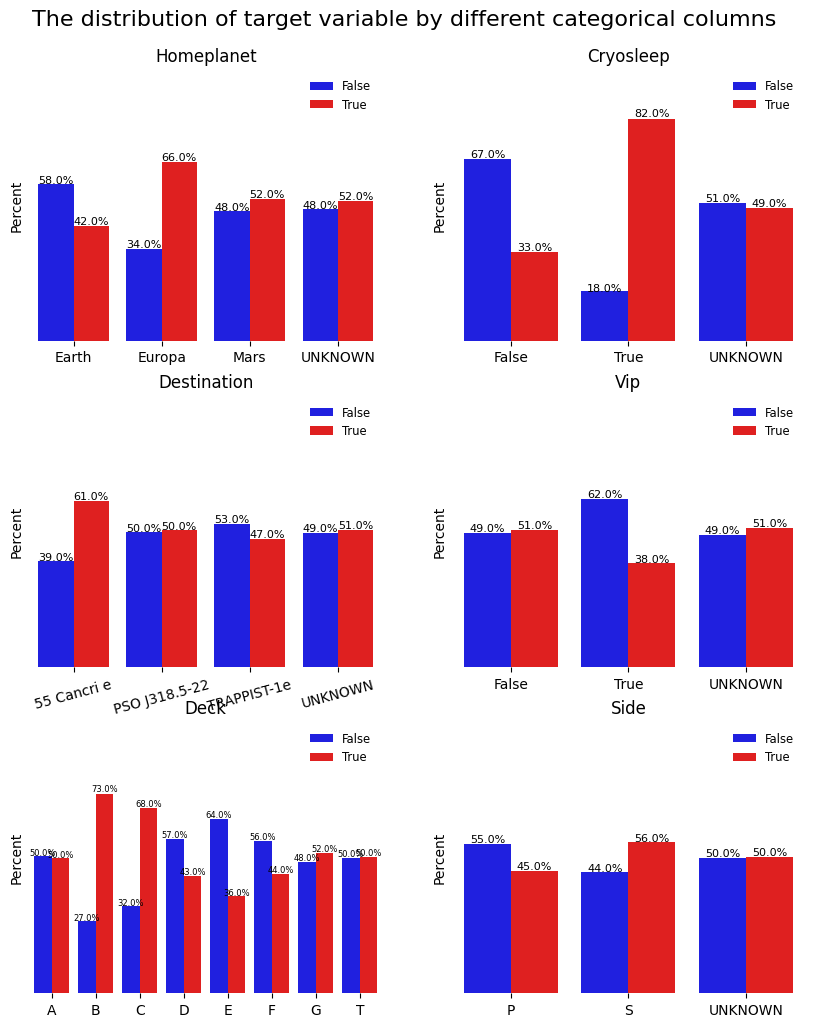

In [29]:
fig = plt.figure(figsize=(10, 12))
plt.suptitle("The distribution of target variable by"
             " different categorical columns", 
             fontsize=16, y=0.93)

cat_columns.remove("Transported")
# create a dataset, where the tests results will be stored
test_res_df = pd.DataFrame(index=cat_columns+["Deck", "Side"], 
                           columns=["chi2", "p"])

for i, column in enumerate(cat_columns+["Deck", "Side"]):
    ax = fig.add_subplot(3, 2, i+1)
    count = pd.crosstab(data_eda['Transported'], data_eda[column])
    
    count = count.apply(lambda x: x / x.sum(), axis=0).fillna(0)
    count = count.stack().reset_index()
    sns.barplot(x=column, y=0, palette=["blue", "red"],
                hue="Transported", data=count)
    ax.set_ylabel("Percent")
    if i==4:
        helper_functions.customize_bar(axes=ax, position="v", 
                                       values_font=6, pct=True)
        ax.set_xticklabels(["A", "B", "C", "D", "E", "F", "G", "T", "Missing"])
    else:
        helper_functions.customize_bar(axes=ax, position="v", 
                                       values_font=8, pct=True)
        
    ax.set_xlabel("")
    ax.set_title(column.capitalize(), fontsize=12)
    ax.set_ylim(0, 1)
    ax.legend(title="", fontsize='small', 
              loc="best", edgecolor="white")
    if i == 2:
        ax.set_xticks(data_eda[column].unique())
        ax.set_xticklabels(ax.get_xticklabels(), rotation=15)

**Tests for statistical significance**:
For two of our binary variables, CryoSpleep and VIP, we will conduct the chi-square of independence.

**Null hypothesis**: There is no significant association between the binary variable and the transported variable

**Alternative hypothesis**: There is a significant association between the binary variable and the transported variable

**Significance level**: 5%

Before doing that, let's check whether the assumptions are met:
   * Although the Kaggle dataset does not explicitly state the sampling method used, we will assume that the data was obtained through Simple Random Sampling (SRS) for the purposes of our project.
   * Assuming that Simple Random Sampling (SRS) was employed, the chi-square test of independence relies on the assumption that observations are independent. However, it is important to note that our dataset includes individuals who may be family members. This introduces the possibility that the assumption of independence could be violated, as family members' outcomes might be correlated. Despite this potential issue, we suggest proceeding with the chi-square test due to the lack of explicit data identifying family relationships.
   * The expected frequency count in each cell of the contingency table should be at least 5. For each test, we will check it separately.

In [30]:
binary_columns = ["CryoSleep", "VIP"]
test_res_df = pd.DataFrame(index=binary_columns, 
                           columns=["chi2", "p"], dtype="int")
for column in binary_columns:
    count = pd.crosstab(data_eda[column],
                       data_eda["Transported"])
    chi2, p, _, exp = chi2_contingency(count)
    test_res_df.loc[column, 'chi2'] = chi2
    test_res_df.loc[column, 'p'] = p
    if (exp < 5).any():
        print(f"The contigency table with {column} has frequency count < 5")

**Test for statistical significance**: For each of our categorical variables, we will do the following: 
1. For each category in the categorical variable, create a contingency table comparing the occurrences of that category with the target variable.
2. Conduct a chi-square test of independence for each contingency table to evaluate if there is a significant association between the specific category and the target variable.

**Null hypothesis**: There is no significant association between the category and the transported variable

**Alternative hypothesis**: There is a significant association between the category and the transported variable

**Significance level**: 5%

In [31]:
for column in ["HomePlanet", "Destination", "Deck", "Side"]:
    for value in data_eda[column].unique():
        data_eda.loc[:, f"{column}_{value}"] = data_eda.loc[:, column].apply(
            lambda x: 1 if x == value else 0)
        count = pd.crosstab(data_eda[f"{column}_{value}"],
                           data_eda["Transported"])
        chi2, p, _, exp = chi2_contingency(count)
        test_res_df.loc[f"{column}_{value}", ["chi2", "p"]] = chi2, p
        if (exp < 5).any():
            print(f"The contigency table with {column} has frequency count < 5")
        data_eda.drop(columns=f"{column}_{value}", inplace=True)

In [32]:
test_res_df.style.background_gradient(cmap='coolwarm')

,chi2,p
CryoSleep,1860.772506,0.000000
VIP,12.130650,0.002322
HomePlanet_Europa,272.719254,0.000000
HomePlanet_Earth,248.911303,0.000000
HomePlanet_Mars,3.165519,0.075209
HomePlanet_UNKNOWN,0.062006,0.803353
Destination_TRAPPIST-1e,77.182049,0.000000
Destination_PSO J318.5-22,0.000000,1.000000
Destination_55 Cancri e,101.899486,0.000000
Destination_UNKNOWN,0.000000,1.000000


1. **Home Planet**:
    * Europa: Passengers from Europa had a notably higher likelihood of being transported, with 66% of them ending up in another dimension.
    * Earth: In contrast, passengers from Earth had a lower likelihood of transportation, with a larger proportion remaining in the original dimension.
    * Significance: There is a significant association between the Europa and Earth categories and the target variable, indicating a meaningful relationship with transportation.

2. **Suspended Animation**:
    * Risk Factor: Passengers in suspended animation had the highest risk of being transported, with 82% of these individuals experiencing transportation.
    * Significance: The chi-square test of independence revealed a significant p-value, suggesting a strong association between suspended animation and the chance of transportation.
    
3. **Destination**:
    * Uniformity: For most destination planets, the probability of transportation was relatively uniform.
    * 55 Cancri e: Passengers traveling to 55 Cancri e had a notably higher likelihood of being transported, indicating a potential risk factor.
    * TRAPPIST-1e: There is a significant association between the TRAPPIST-1e category and the target variable, highlighting its relevance in transportation risk.
    
4. **VIP Services**:
    * Lower Likelihood: Passengers who paid for VIP services were less likely to be transported. This suggests that financial resources might be associated with better protection or preparedness, potentially reducing the risk of transportation.

5. **Side of the Ship**:
    * Starboard vs. Port: Passengers on the starboard side had a slightly higher likelihood of being transported compared to those on the port side. This finding suggests a possible spatial factor influencing transportation risk.

6. **Deck**:
    * Equal Likelihood on Deck A and G: On Decks A and G, the number of transported versus non-transported passengers was approximately equal, indicating no clear association.
    * Increased Risk on Decks B and C: Passengers on Decks B and C were more likely to be transported, whereas those on Decks D, E, and F were less likely. This variability suggests that deck location could influence transportation likelihood, possibly due to differences in safety measures or conditions across the decks.

7. **Missing Values**: It is important to address the impact of missing data on the analysis. For each of the variables discussed above, there appears to be no significant association between the presence of missing values and the target variable. The proportions of transported and non-transported passengers are similar for rows with missing data, suggesting that the missingness does not bias the results.

**Relationships between numeric columns and the target variable**

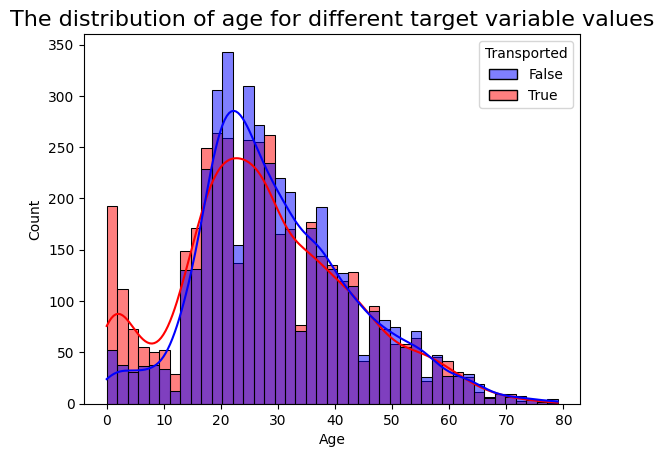

In [33]:
sns.histplot(x="Age", data=data_eda, kde=True, 
             color="blue", hue="Transported", palette=["blue", "red"])
plt.title("The distribution of age for different target variable values",
          fontsize=16);

The overall distribution of age appears similar between transported and non-transported passengers. However, it is important to note a specific trend: among children, the proportion of those who were transported is higher. This suggests that being a child could be a significant predictor of the likelihood of transportation.

**Null hypothesis**: There is no significant association between the fact that a person is a child and the chance of transportation

**Alternative hypothesis**: There is an association between the fact that a person is a child and the chance of transportation

**Significance level**: 5%

In [34]:
data_eda["child"] = data_eda["Age"].apply(lambda x: 1 if x < 18 else 0)
child_transported = pd.crosstab(data_eda["child"], data_eda["Transported"])
chi2, p, _, _ = chi2_contingency(child_transported)
print(f"Statistic: {chi2}, p-value: {p}")
child_transported

Statistic: 118.68286612774818, p-value: 1.2288641987050646e-27


Transported,False,True
child,,
0,3739,3404
1,572,973


We reject the Null hypothesis. Therefore, we conclude that children had significantly higher chance of being transported.

Now, let's compare means of payments for amenities between two groups of Transported variable.

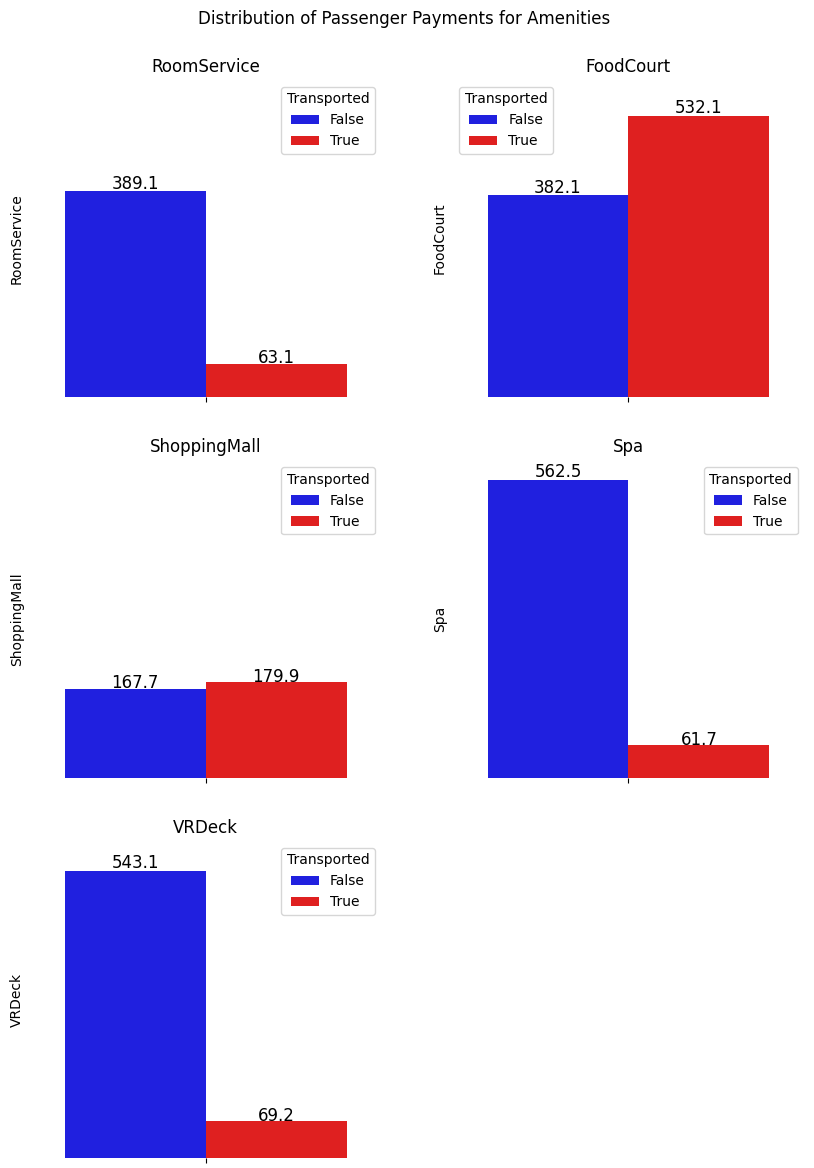

In [35]:
fig = plt.figure(figsize=(10, 14))
plt.suptitle("Distribution of Passenger Payments for Amenities\n", y=0.93)
for i, column in enumerate(num_columns[1:]):
    ax = fig.add_subplot(3, 2, i+1)
    sns.barplot(y=column, data=data_eda, palette=["blue", "red"],
                ax=ax, hue="Transported", errorbar=None)
    ax.set_title(column)
    ax.set_xlabel("")
    helper_functions.customize_bar(axes=ax, position="v", round_to=1)
    plt.ylim(0, 600)

An interesting pattern emerges in the spending behavior of passengers in relation to their transportation status:

**Lower Spending on Certain Services**: Passengers who were transported to another dimension paid significantly less for services such as VRDeck, RoomService, and Spa compared to those who were not transported. This suggests a potential association between lower expenditure on these services and a higher likelihood of transportation.

**Similar Spending on ShoppingMall**: The amount spent on ShoppingMall services was similar for both transported and non-transported passengers. This indicates that spending in this category does not appear to be a distinguishing factor in the likelihood of transportation.

**Higher Spending on Food Court**: Notably, passengers who spent more on the Food Court had a higher chance of being transported. This finding suggests that higher expenditure on food-related services is associated with a greater likelihood of transportation.

**Is there some association between number of people in a group and the chance of transportation?**

In [36]:
data_eda["GroupCount"] = data_eda.groupby("Group").transform("size")
data_eda["MultipleGroup"] = data_eda["GroupCount"].apply(lambda x: 0 if x == 1 else 1)

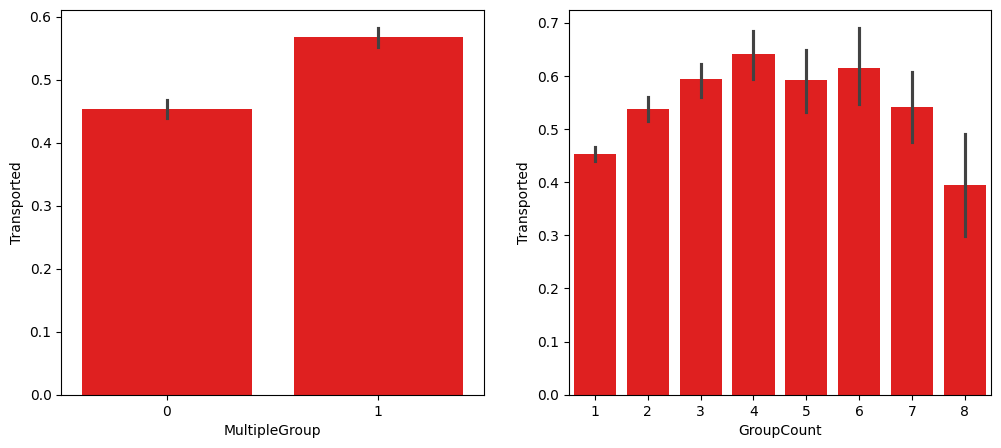

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.barplot(x="MultipleGroup", data=data_eda, y="Transported", 
            color="red", ax=ax[0])

sns.barplot(x="GroupCount", data=data_eda, y="Transported", 
            ax=ax[1], color="red", orient="v");

Here we see that, those people, who belonged to a group of more than 1 people, had a higher chance of transportation. The second plot shows us that people, who had around 4-5 members in a group had the highest chance of being transported to another dimension.

Our goal is to determine whether individuals traveling with family members had a higher likelihood of being transported. While sharing the same last name doesn't guarantee a familial relationship, it significantly increases the probability.

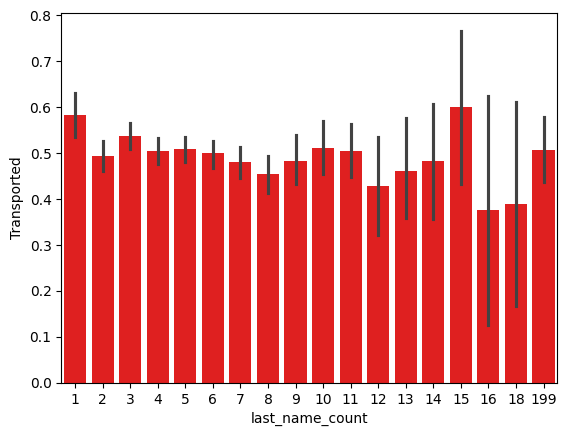

In [38]:
data_eda["last_name_count"] = data_eda.groupby("last_name").transform("size")
sns.barplot(x="last_name_count", data=data_eda, y="Transported", color="red");

The above bar plot indicates that people, who had a lot of family members(or those with the same surnames) had the same chances of being transported. 

**Is there some association between number of people in a cabin and the chance of transportation?**

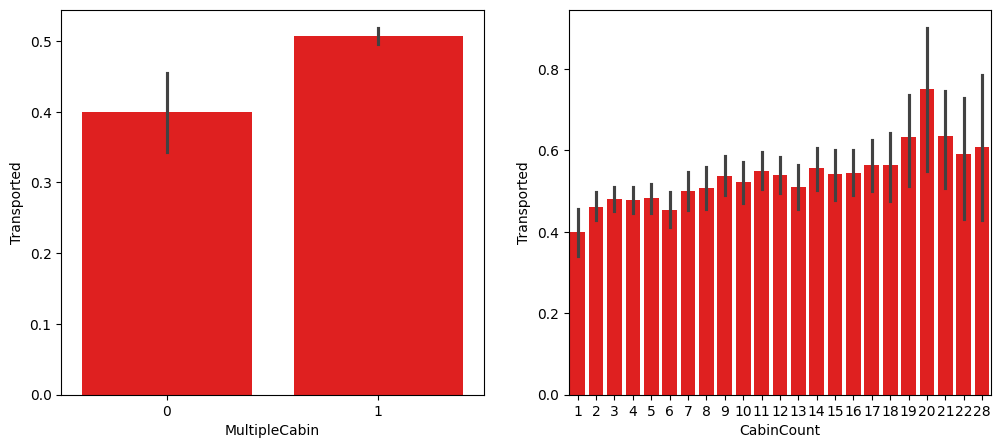

In [39]:
data_eda["CabinCount"] = data_eda.groupby("CabinNumber").transform("size")
data_eda["MultipleCabin"] = data_eda["CabinCount"].apply(lambda x: 0 if x == 1 else 1)
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.barplot(x="MultipleCabin", data=data_eda, y="Transported", 
            color="red", ax=ax[0])

sns.barplot(x="CabinCount", data=data_eda, y="Transported", 
            ax=ax[1], color="red");
ax[1].set_xticklabels(list(range(1, 23)) + [28]);

We see that having more people in a cabin indicates a higher chance of transportation

**Is there some association between the cabin number and the chance of transportation?**

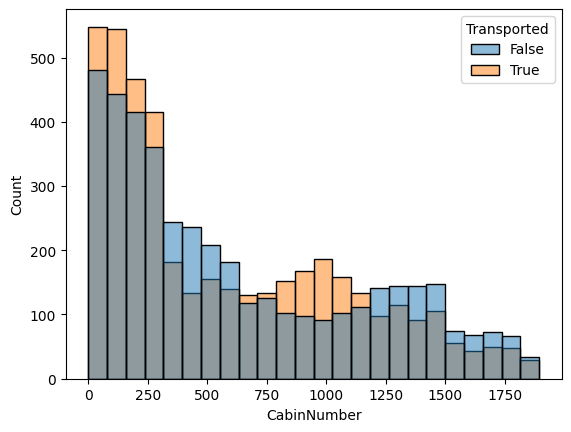

In [40]:
sns.histplot(x="CabinNumber", data=data_eda, hue="Transported");

Very interesting pattern emerges from the above histogram. There are groups of cabin numbers, where the chance of transportation is different. 

In [41]:
data_eda["CabinGroup"] = (pd.cut(data_eda["CabinNumber"], 
                                 bins=[0, 300, 650, 1150, 2000], 
                                 include_lowest=True, labels=[1, 2, 3, 4]))

### Relationships between predictor variables

By exploring these relationships, we will try to understand how we could impute missing values for the columns in the dataset.

**HomePlanet and Destination**

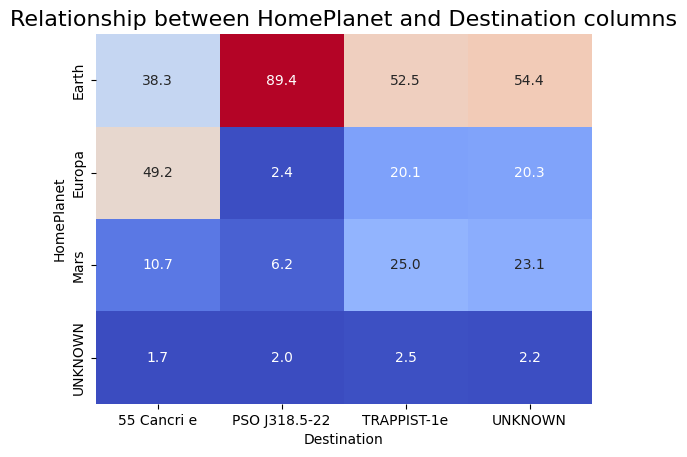

In [42]:
helper_functions.pct_heatmap(data_eda, "HomePlanet", "Destination", plt.gca())
plt.title("Relationship between HomePlanet and Destination columns",
         fontsize=16);

Almost all passengers, who were travelling to PSO J318.5-22 planet, are from Earth.

**Deck and Homeplanet, Destination**

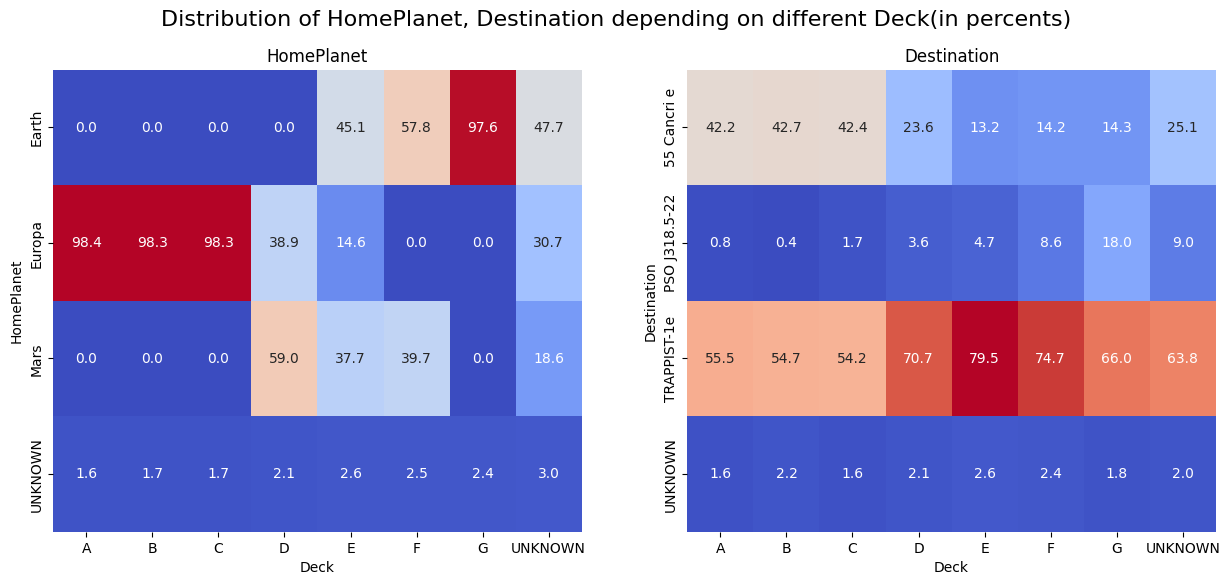

In [43]:
helper_functions.heatmap_association(data_eda, "Deck", "HomePlanet", "Destination")

We see that on Deck A, B and C almost all of the passengers are from Europa. On Deck G almost all of the passengers are from Earth. In addition, majority of the passengers from the D deck are from Mars. 

Regarding Destination column, there doesn't seem to be any pattern. In each of the decks, more than 50% of passengers are from TRAPPIST-1e.

**Side and Destination, HomePlanet**

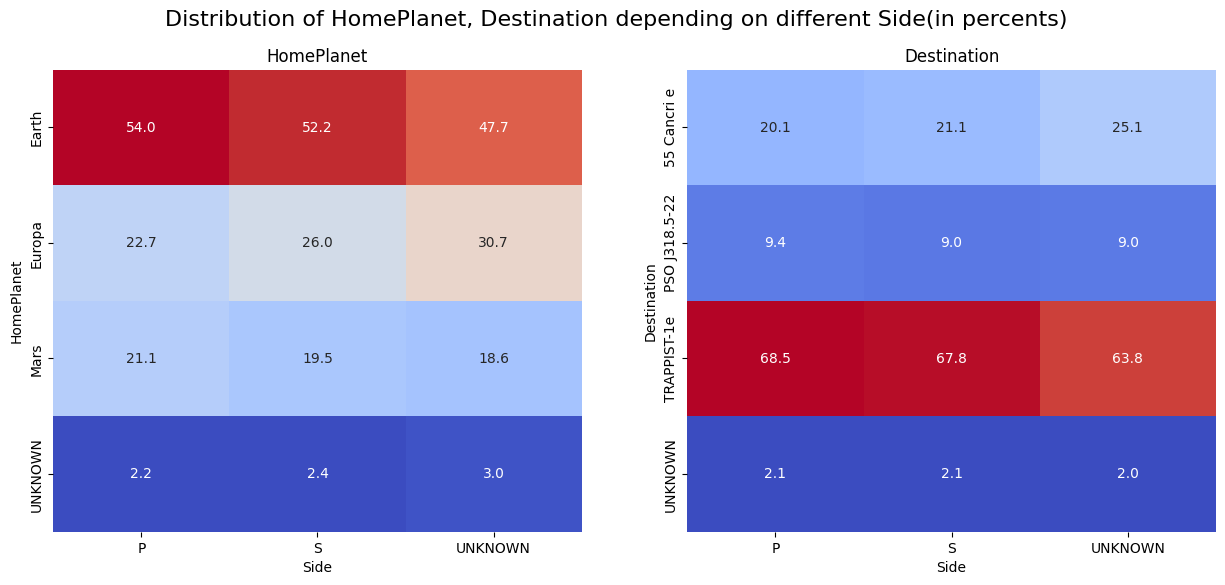

In [44]:
helper_functions.heatmap_association(data_eda, "Side", "HomePlanet", "Destination")

There doesn't seem to be any association between each of the HomePlanet, Destination columns and Side.

**Association between group number, family and HomePlanet, Destination**

We will try to find out whether people, who belong to the same group or have the same last name, are from the same homeplanet or travelling to the same destination.

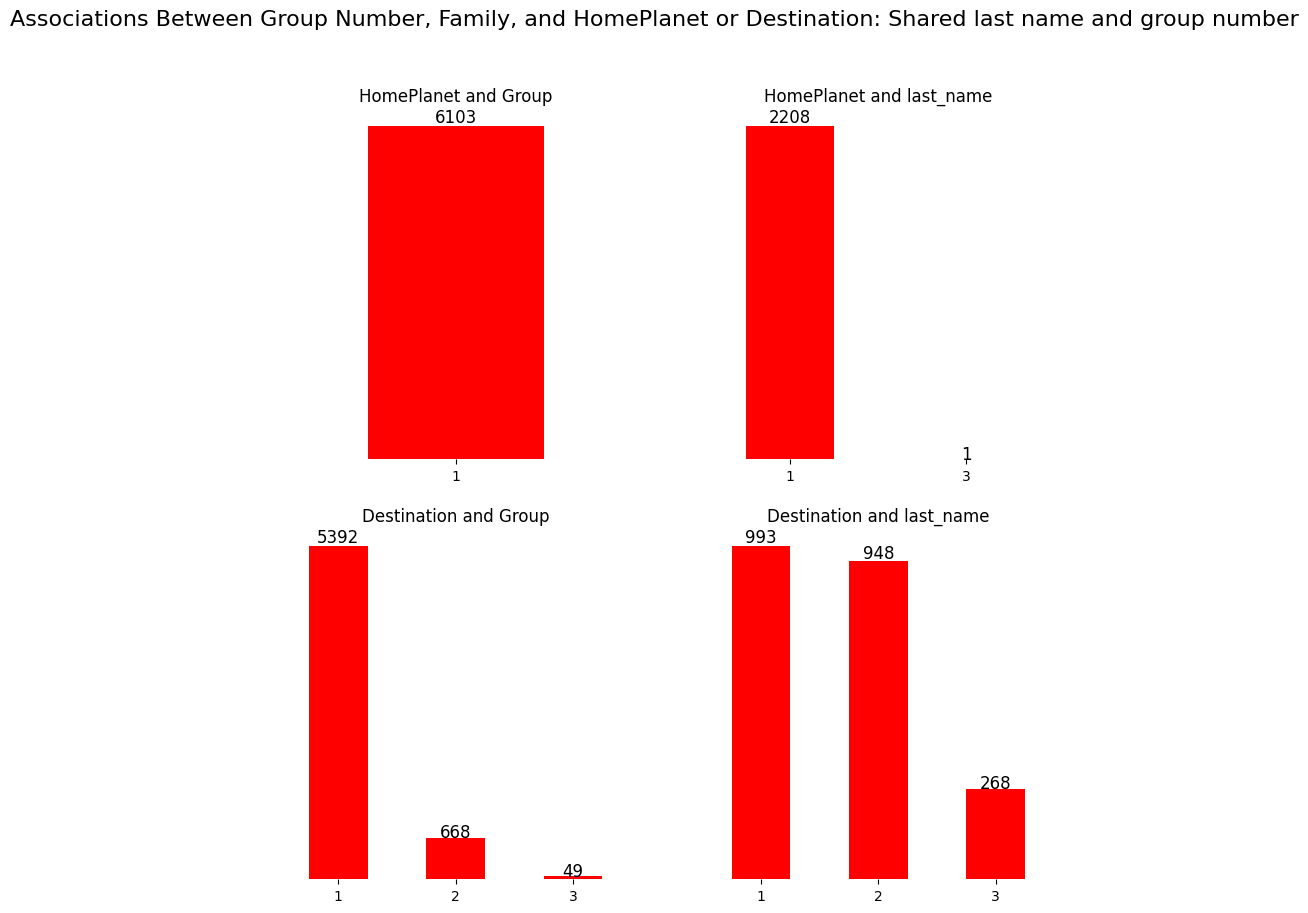

In [45]:
fig = plt.figure(figsize=(10, 10))
i = 1
for planet_column in ["HomePlanet", "Destination"]:
    for group in ["Group", "last_name"]:
        ax = fig.add_subplot(2, 2, i)
        ax.set_title(f"{planet_column} and {group}")
        # count number of people in each group and planet column
        group_planet = (data_eda.groupby([group, planet_column])
                        .size().unstack().fillna(0).drop(columns="UNKNOWN"))
        
        # count number of different planets in each of the group
        planet_count_group = (group_planet > 0).sum(axis=1)
        planet_count_group = planet_count_group[planet_count_group != 0]
        planet_count_group.value_counts().plot(kind="bar", ax=ax, color="red")
        i += 1
        helper_functions.customize_bar(axes=ax, position="v")
plt.suptitle("Associations Between Group Number, Family, and HomePlanet or Destination:"
             " Shared last name and group number", fontsize=16);

There is some interesting insight regarding the HomePlanet column: all people, who belong the same group, travel from the same HomePlanet. In addition, almost all people, who share the same last name, are from the same HomePlanet.

**Association between Age and the following categorical variables: CryoSleep, HomePlanet, Destination**

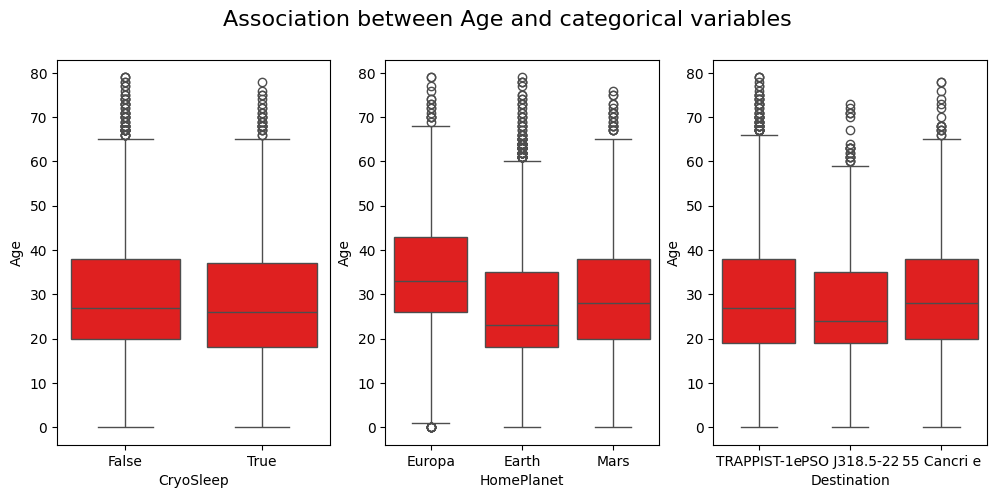

In [46]:
fig = plt.figure(figsize=(12, 5))
for i, column in enumerate(["CryoSleep", "HomePlanet", "Destination"]):
    ax = fig.add_subplot(1, 3, i+1)
    sns.boxplot(y="Age", data=data_eda[data_eda[column] != "UNKNOWN"],
                ax=ax, color="red", x=column)
plt.suptitle("Association between Age and categorical variables", fontsize=16);

From the above box plots, we can see that people from Europa are older. Age is similar for those who were and weren't confined to their cabins and for people of different destinations. The fact that there are less children coming from Europa could be one of the reasons why Europa people had higher chance of transportation.

**Association between CryoSleep and Deck, Side**

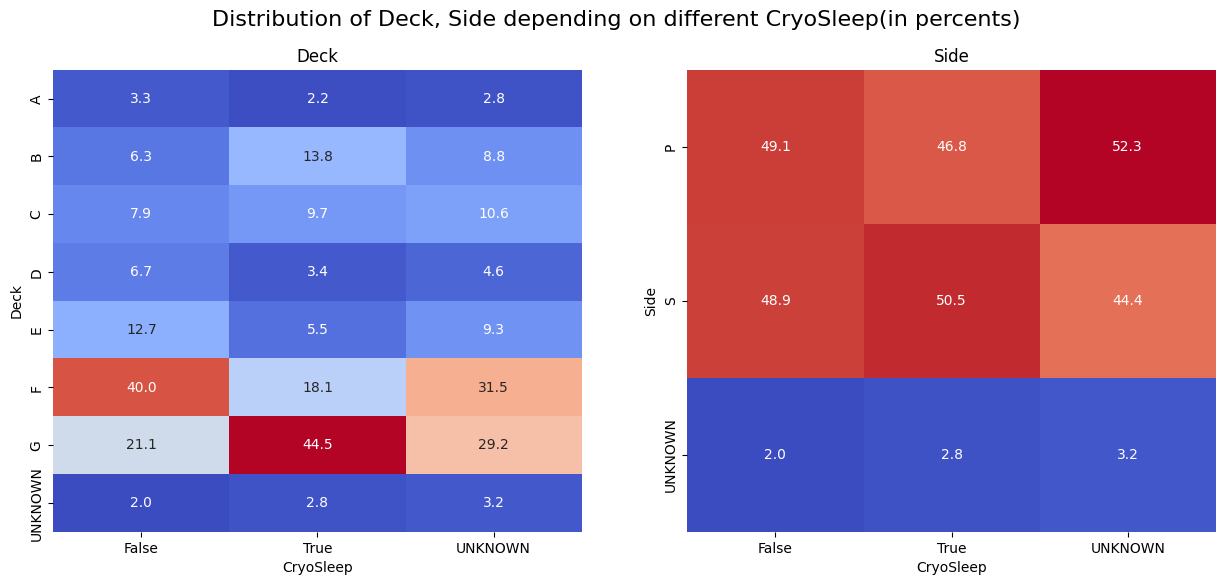

In [47]:
helper_functions.heatmap_association(data_eda, "CryoSleep", "Deck", "Side")

There seems to be more suspended people from deck G. Interestingly, on Deck F there are more non-suspended people.

**Association between CryoSleep and HomePlanet, Destination**

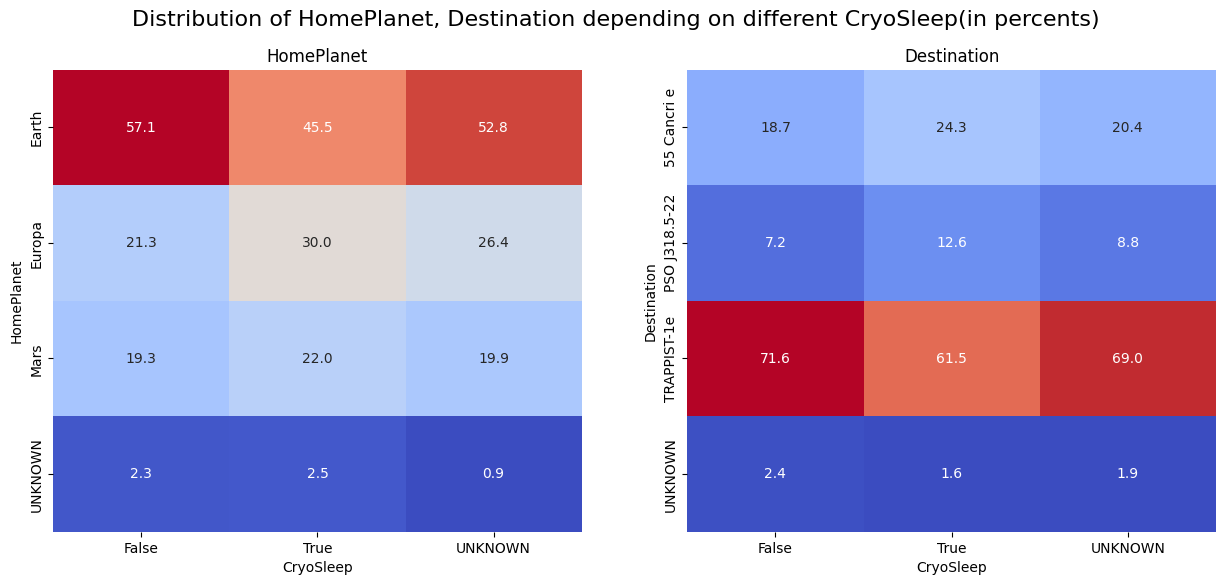

In [48]:
helper_functions.heatmap_association(data_eda, "CryoSleep", "HomePlanet", "Destination")

There doesn't seem to be association.

**Association between VIP and HomePlanet, Destination**

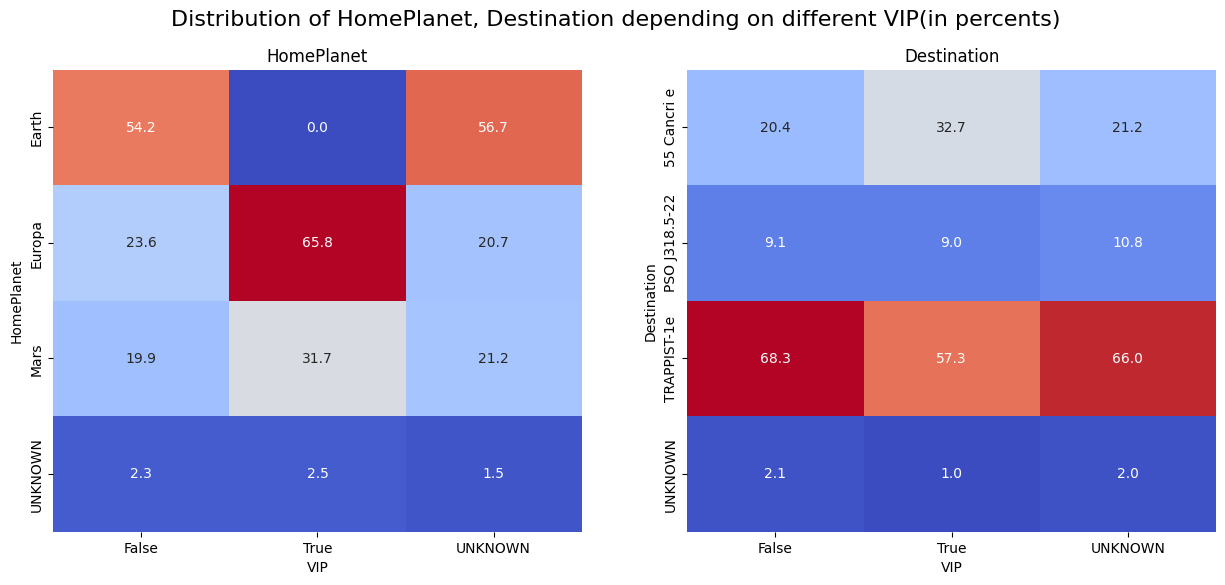

In [49]:
helper_functions.heatmap_association(data_eda, "VIP", "HomePlanet", "Destination")

Those, who paid for VIP services, are most likely from Europa. No one from Earth paid for VIP services.

**Association between VIP and Side, Deck**

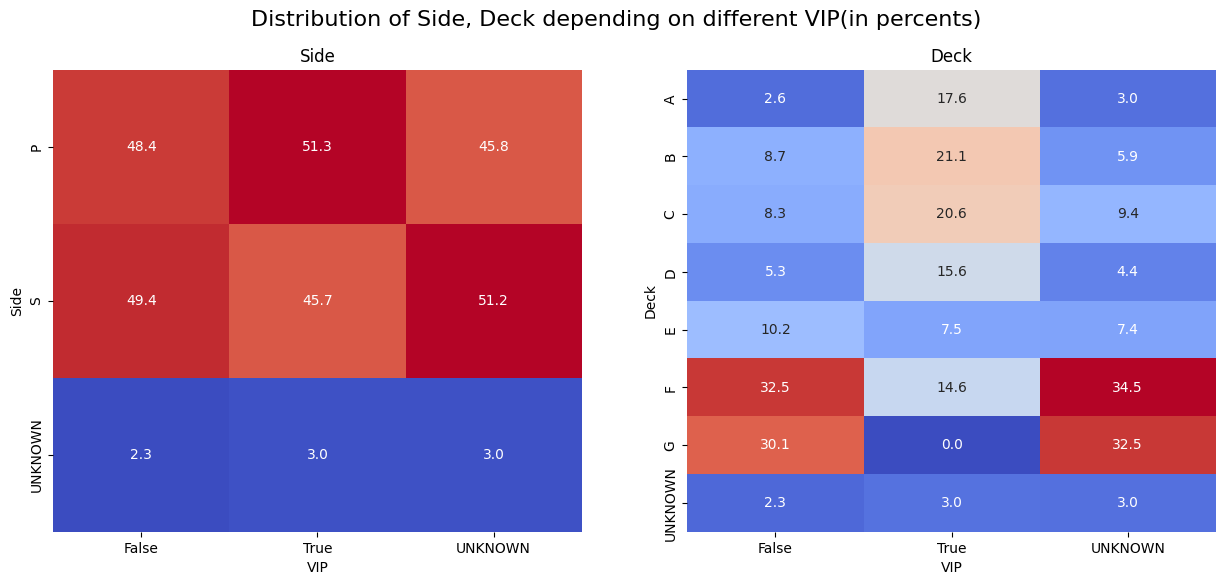

In [50]:
helper_functions.heatmap_association(data_eda, "VIP", "Side", "Deck")

Interestingly, those, who paid for VIP services, don't come from G deck. There are a lot of them on deck A, B and C.

**Association between each of the luxury amenties and HomePlanet, Destination**

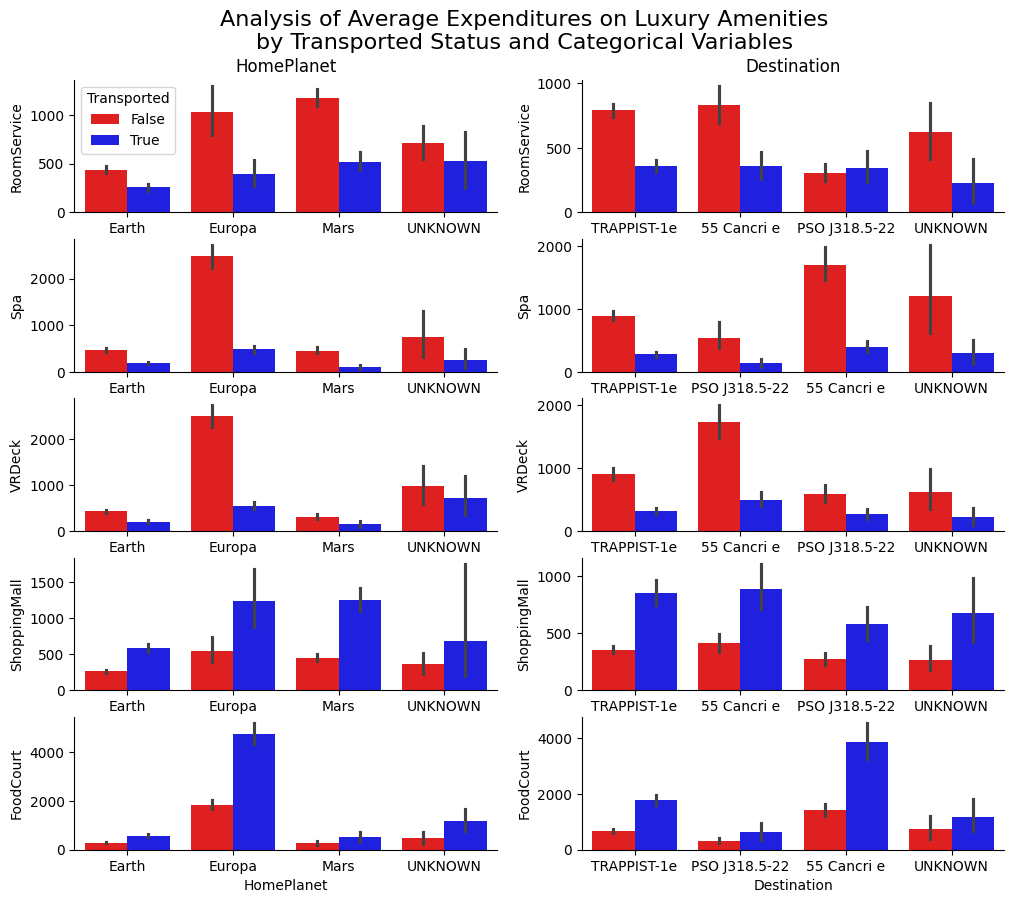

In [51]:
fig, ax = plt.subplots(5, 2, figsize=(12, 10))
plt.suptitle("Analysis of Average Expenditures on Luxury Amenities\n"
             "by Transported Status and Categorical Variables", 
             y=0.95, fontsize=16)
ax[0, 0].set_title("HomePlanet")
ax[0, 1].set_title("Destination")
for i, column in enumerate(["HomePlanet", "Destination"]):
    sns.barplot(y="RoomService", data=data_eda[data_eda["RoomService"] != 0],
                ax=ax[0, i], x=column, hue="Transported", palette=["red", "blue"],
                legend=False if i > 0 else True)
    sns.barplot(y="Spa", data=data_eda[data_eda["Spa"] != 0], 
                ax=ax[1, i], x=column, hue="Transported", 
                legend=False, palette=["red", "blue"])
    
    sns.barplot(y="VRDeck", data=data_eda[data_eda["VRDeck"] != 0],
                ax=ax[2, i], x=column, hue="Transported", 
                legend=False, palette=["red", "blue"])
    
    sns.barplot(y="ShoppingMall", data=data_eda[data_eda["ShoppingMall"] != 0],
                ax=ax[3, i], x=column, hue="Transported", 
                legend=False, palette=["red", "blue"])
    
    sns.barplot(y="FoodCourt", data=data_eda[data_eda["FoodCourt"] != 0],
                ax=ax[4, i], x=column, hue="Transported", 
                legend=False, palette=["red", "blue"])
    sns.despine()

Regardless of HomePlanet or Destination, individuals who were not transported to another dimension spent more on RoomService, Spa, and VRDeck, but spent less on ShoppingMall and FoodCourt.

Again, the distributions for missing rows are similar to other groups.

**Association between each of the luxury amenties and Deck, Side of the Ship**

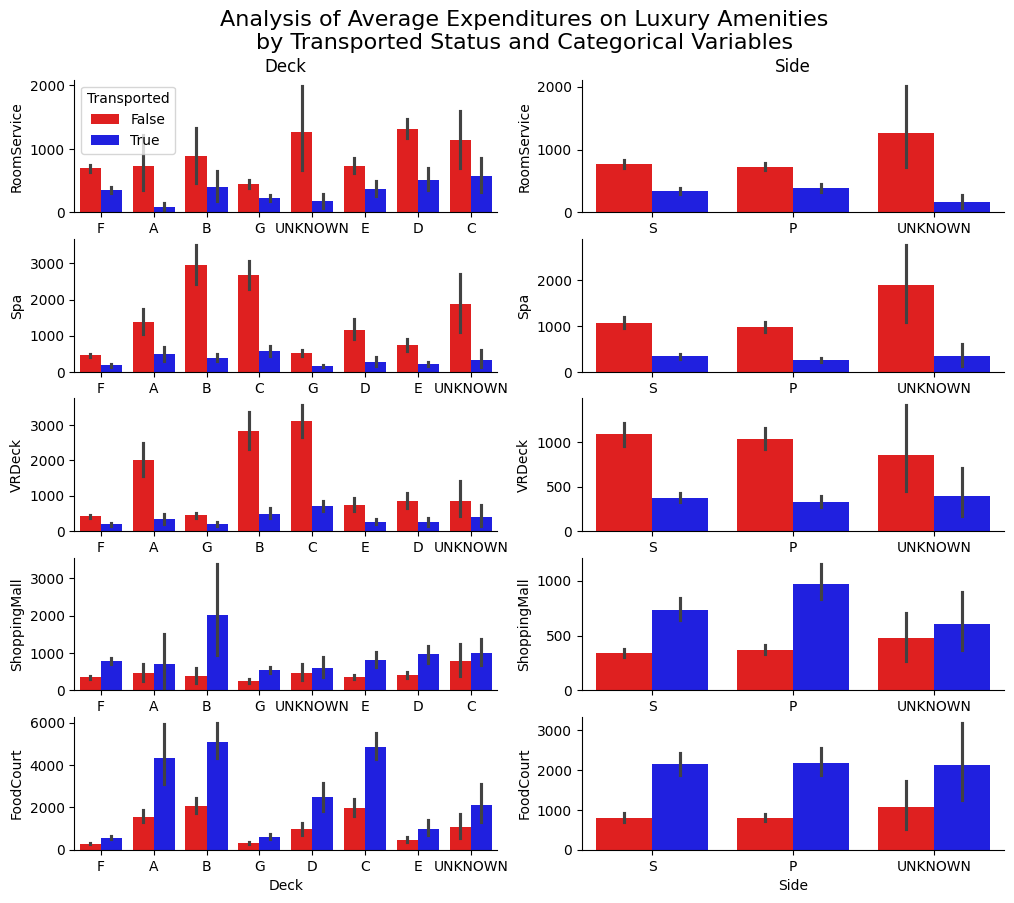

In [52]:
fig, ax = plt.subplots(5, 2, figsize=(12, 10))
plt.suptitle("Analysis of Average Expenditures on Luxury Amenities\n"
             "by Transported Status and Categorical Variables", 
             y=0.95, fontsize=16)
ax[0, 0].set_title("Deck")
ax[0, 1].set_title("Side")
for i, column in enumerate(["Deck", "Side"]):
    sns.barplot(y="RoomService", data=data_eda[data_eda["RoomService"] != 0],
                ax=ax[0, i], x=column, hue="Transported", palette=["red", "blue"],
                legend=False if i > 0 else True)
    sns.barplot(y="Spa", data=data_eda[data_eda["Spa"] != 0], 
                ax=ax[1, i], x=column, hue="Transported", 
                legend=False, palette=["red", "blue"])
    
    sns.barplot(y="VRDeck", data=data_eda[data_eda["VRDeck"] != 0],
                ax=ax[2, i], x=column, hue="Transported", 
                legend=False, palette=["red", "blue"])
    
    sns.barplot(y="ShoppingMall", data=data_eda[data_eda["ShoppingMall"] != 0],
                ax=ax[3, i], x=column, hue="Transported", 
                legend=False, palette=["red", "blue"])
    
    sns.barplot(y="FoodCourt", data=data_eda[data_eda["FoodCourt"] != 0],
                ax=ax[4, i], x=column, hue="Transported", 
                legend=False, palette=["red", "blue"])
    sns.despine()

Again, the place of the ship isn't what gives us this pattern. Regardless of the Deck or Side of the Ship, people who were transported to another dimension, paid more for ShoppinMall and FoodCourt services.

**Association between side and deck of the ship**

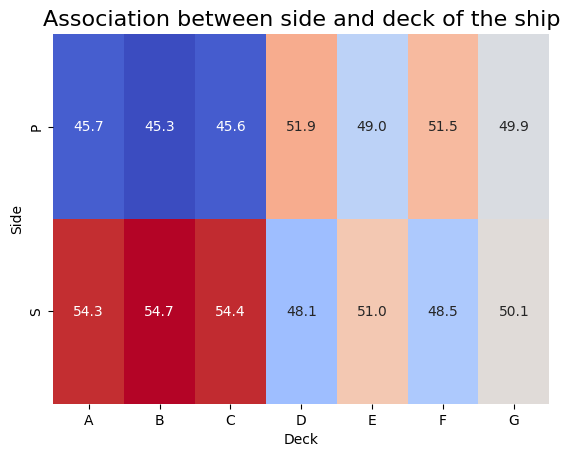

In [53]:
helper_functions.pct_heatmap(data_eda[data_eda["Side"] != "UNKNOWN"],
                             "Side", "Deck", ax=plt.gca())
plt.title("Association between side and deck of the ship", fontsize=16);

The number of people on different sides is similar between all decks.

**Association between CabinCount and Side, Deck**

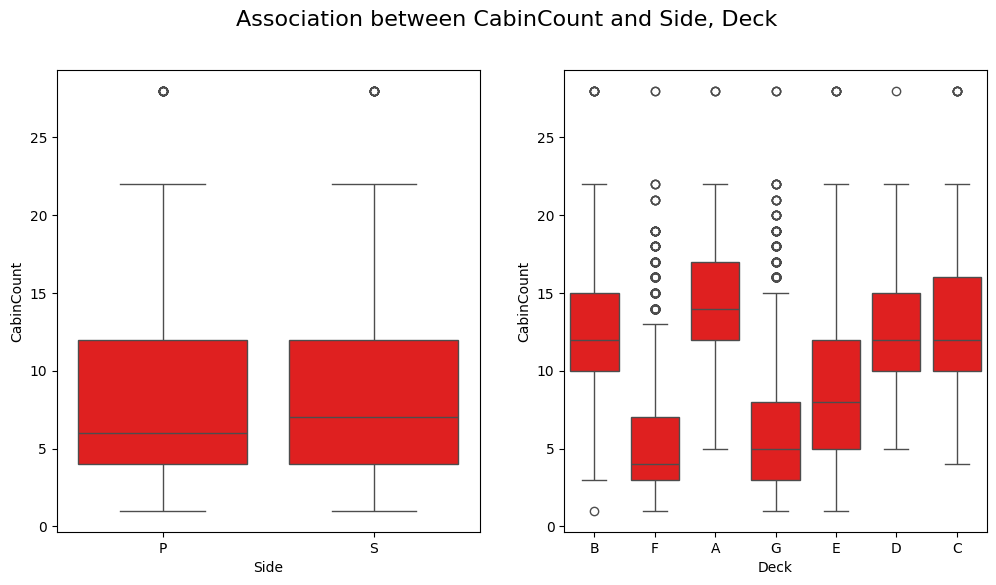

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(y="CabinCount", data=data_eda[data_eda["Side"] != "UNKNOWN"],
            x="Side", color="red", ax=ax[0])

sns.boxplot(y="CabinCount", data=data_eda[data_eda["Side"] != "UNKNOWN"],
            x="Deck", color="red", ax=ax[1])

plt.suptitle("Association between CabinCount and Side, Deck", fontsize=16);

In general, number of people in a cabin doesn't seem to be related to the side or deck of the ship. However, on decks F and G, there seem to be less people on a cabin.

**Association between the fact that a person have multiple people on their group and Deck, Side** 

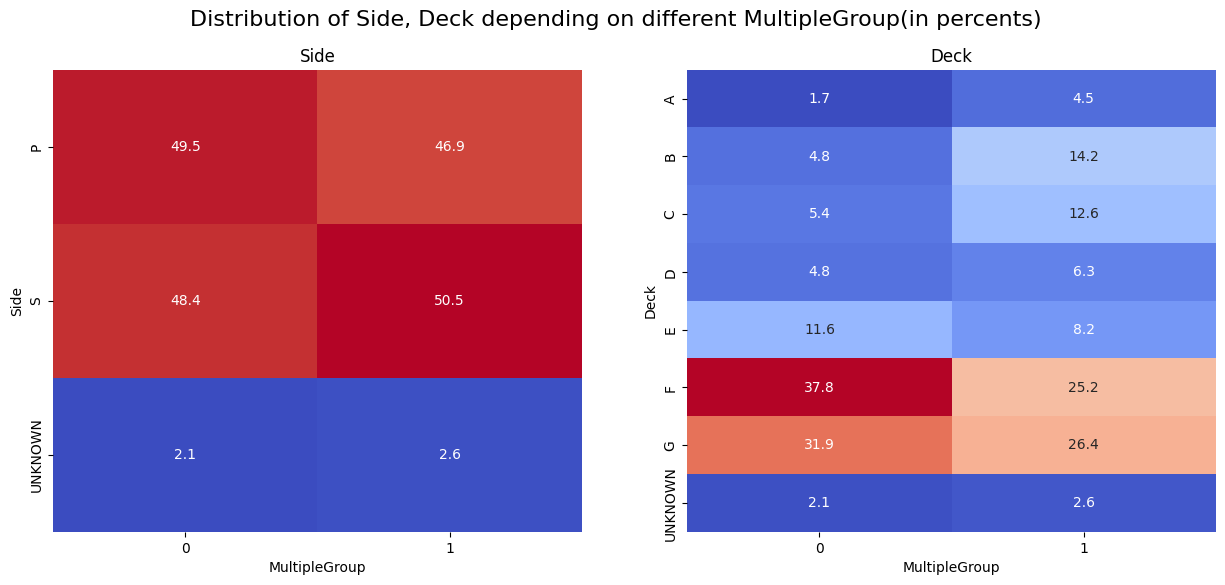

In [55]:
helper_functions.heatmap_association(data_eda, "MultipleGroup", "Side", "Deck")

There doesn't seem to be any association

**Association between the Group number and the Cabin number**

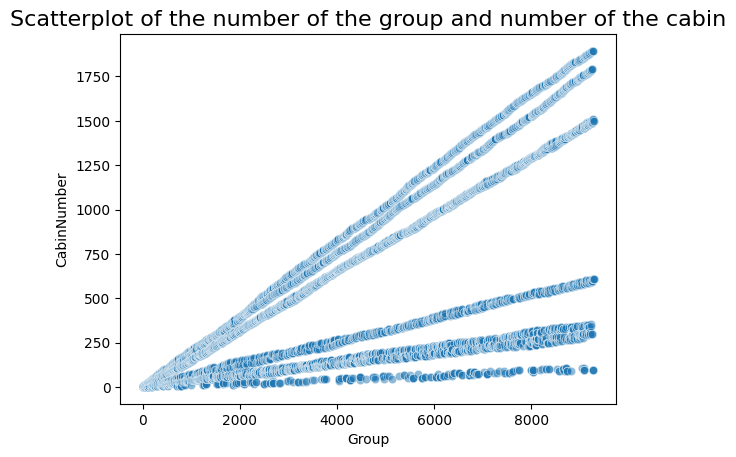

In [56]:
sns.scatterplot(x="Group", y="CabinNumber", 
                data=data_eda, alpha=0.5)
plt.title("Scatterplot of the number of the group and number of the cabin",
         fontsize=16);

Here, we see linear relationship between the group number and the cabin number.

# Conclusion
* **Missing data**: All of the columns, except for id of the passenger have missing values. There are around 200 missing values for each of the columns. The data seem to be missing completely at random. Throughout our exploratory data analysis, we haven't found any pattern among rows with missing values.
* **Association with the target variable**: 
    * There is an association between the planet the passenger departed from and their chance of transporation. Test for statistical significance has given statistically significant values for Europa and Earth categories and the target variable.
    * There is a strong association between suspended animation and the chance of transportation. 
    * Passengers traveling to 55 Cancri e planet had a notably higher likelihood of being transported, indicating a potential risk factor. There is a significant association between the TRAPPIST-1e destination and the target variable, highlighting its relevance in transportation risk.
    * Passengers who paid for VIP services were less likely to be transported. This suggests that financial resources might be associated with better protection or preparedness, potentially reducing the risk of transportation.
    * Passengers on the starboard side had a slightly higher likelihood of being transported compared to those on the port side. 
    * There is significant association between the child and the chance of transportation. Children had significantly higher chance of being transported.
    * Passengers who were transported to another dimension paid significantly less for services such as VRDeck, RoomService, and Spa compared to those who were not transported. The amount spent on ShoppingMall services was similar for both transported and non-transported passengers. Passengers who spent more on the Food Court had a higher chance of being transported. This association is similar regardless of the HomePlanet, Destination, Deck, Side columns.
    * People, who had more people in their cabin, had higher chance of transportation. In addition, those, who were in a group of 2 or more people, were also at a higher risk.

* **Association between the predictor columns**
    * On Deck A, B and C almost all of the passengers are from Europa. On Deck G almost all of the passengers are from Earth. In addition, majority of the passengers from the D deck are from Mars.
    * All people, who belong the same group, travel from the same HomePlanet. In addition, almost all people, who share the same last name, are from the same HomePlanet.
    * The number of people on different sides is similar between all decks.
    * There is linear relationship between the group number and cabin number of the passenger.